# 1. Open Exploration with 17 Objectives with Best and Worst case scenarios

## 1.1 Introduction

17 Objectives, no policy

In [1]:
# load library

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics

from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy)
from ema_workbench import load_results
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\na0e2\Miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


<Logger EMA (DEBUG)>

In [2]:
# no policy base case

from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

results = utilities.load_results('results/base_case_75.csv')

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_75.csv


In [3]:
experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)

results = experiments.join(outcomes)
results = results.drop(columns="model")
results

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,22.0,316.720229,1.5,0.508918,179.556360,1.0,0.056675,161.786225,1.0,0.411000,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
1,37.0,48.449390,1.5,0.726517,71.388513,1.0,0.316716,140.869331,10.0,0.288527,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
2,116.0,342.466577,1.5,0.696968,164.240184,10.0,0.070253,241.641985,10.0,0.701739,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
3,131.0,317.750054,10.0,0.514734,41.084696,10.0,0.670645,172.060501,1.5,0.002929,...,2.711919e+07,0.002314,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,568.536776
4,69.0,134.031006,1.0,0.056991,141.114722,10.0,0.138095,275.399627,1.0,0.807559,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,23.0,151.955766,10.0,0.943525,149.089915,1.5,0.594206,270.182770,1.5,0.089715,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000
74996,39.0,224.496227,1.0,0.390712,243.949795,1.0,0.090980,310.542851,1.5,0.569246,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000
74997,45.0,347.284444,1.0,0.687342,59.820104,1.0,0.659417,229.083131,1.0,0.643934,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000
74998,124.0,106.585076,1.0,0.434781,132.822331,10.0,0.266128,170.757239,10.0,0.151776,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000


In [4]:
base_results = utilities.load_results('results/base_case_without_policy.csv')

base_experiments, base_outcomes = base_results
base_outcomes = pd.DataFrame(base_outcomes)
base_experiments = pd.DataFrame(base_experiments)

base_results = base_experiments.join(base_outcomes)
base_results = base_results.drop(columns="model")
base_results

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_without_policy.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,62.0,84.997178,1.0,0.957652,302.697759,1.0,0.712827,133.589414,1.0,0.238457,...,0,0.662632,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,3.0,345.623637,1.0,0.483549,166.050246,10.0,0.286214,79.130315,1.5,0.080464,...,0,1.092732,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2,130.0,193.012997,1.5,0.653016,224.624180,10.0,0.349210,217.541726,1.5,0.063713,...,0,1.077036,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
3,6.0,115.440169,1.0,0.696211,183.928033,10.0,0.841538,153.686659,10.0,0.919403,...,0,0.023142,2.423024e+06,0,0.001621,3.321234e+07,0,0.037189,0.0,0.0
4,30.0,346.490014,1.0,0.441742,294.524107,1.0,0.485913,313.654161,1.5,0.915752,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27.0,231.934052,1.0,0.896620,269.749043,10.0,0.410018,260.800822,1.0,0.638854,...,0,0.004116,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
996,101.0,326.634235,1.5,0.384356,218.039156,10.0,0.453245,296.384211,1.0,0.581751,...,0,0.000000,0.000000e+00,0,0.000000,1.078552e+08,0,0.068980,0.0,0.0
997,130.0,330.657857,1.5,0.744546,255.491556,1.5,0.202691,167.968988,10.0,0.161231,...,0,0.829496,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
998,113.0,347.754397,1.5,0.699881,57.640404,1.5,0.561584,205.719905,1.0,0.344590,...,0,0.286528,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0


In [5]:
dike_lists = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']

Time step:0, Expected Annual Damage of each dike


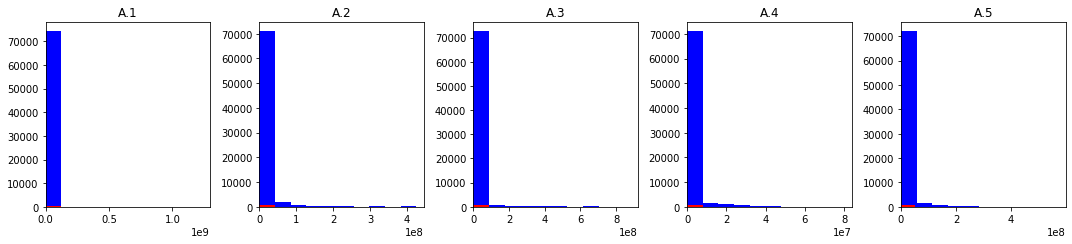

Time step:1, Expected Annual Damage of each dike


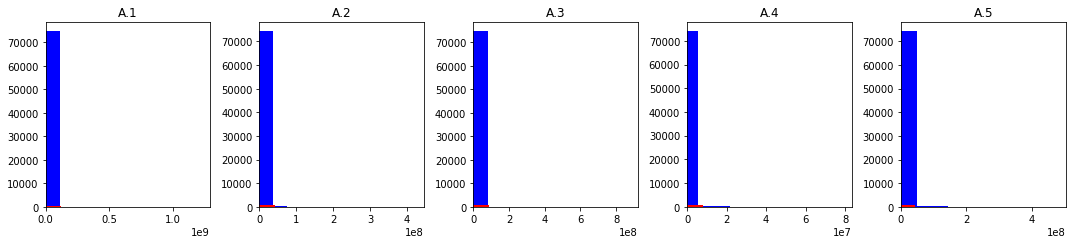

Time step:2, Expected Annual Damage of each dike


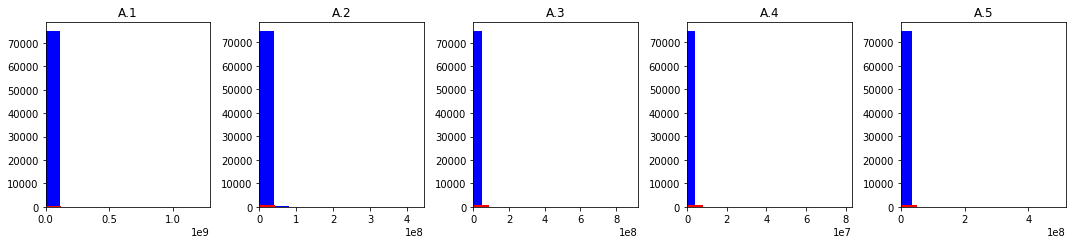

In [6]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

    print("Time step:" + str(n) + ", Expected Annual Damage of each dike")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Annual Damage "+str(n)] , color = 'blue')
        a.hist(base_results[str(i) + "_Expected Annual Damage "+str(n)] , color = 'red')
        a.set_xlim(left=0)
        #a.set_ylim([0,900])
        a.set_title(i)
        


    plt.tight_layout()
    plt.show()

Time step:0, Expected Number of Deaths of each dike


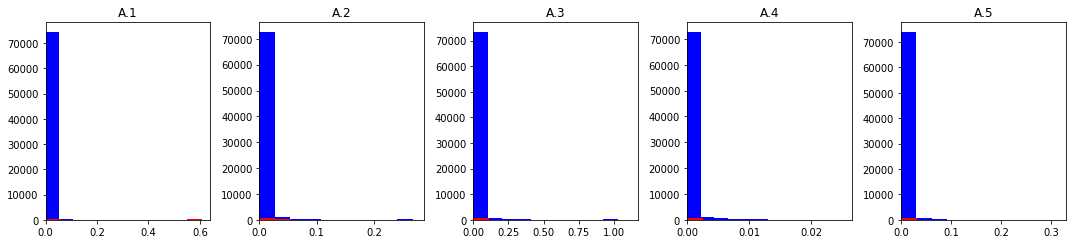

Time step:1, Expected Number of Deaths of each dike


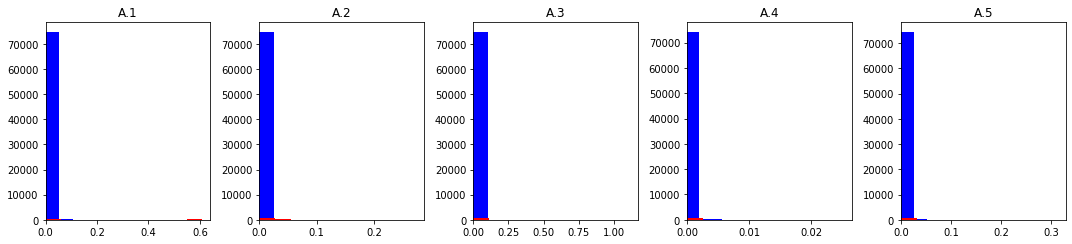

Time step:2, Expected Number of Deaths of each dike


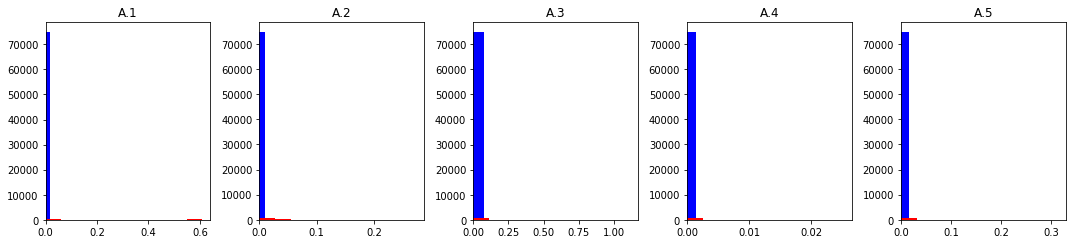

In [158]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

    print("Time step:" + str(n) + ", Expected Number of Deaths of each dike")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Number of Deaths "+str(n)] , color = 'blue')
        a.hist(base_results[str(i) + "_Expected Number of Deaths "+str(n)] , color = 'red')
        a.set_xlim(left=0)
        #a.set_ylim([0,900])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

[6438539.448959761, 9429265.519986873, 13100285.542753108, 1410644.4414323377, 7709141.058370321]
damage
[355125182.61733544, 50715999.84645771, 132122001.79553422, 5888394.024567844, 23066239.240156006]
base_damage
[2404862.8698838707, 1345850.7424574313, 1389497.2786325708, 287702.1917360134, 1902594.3843725016]
damage
[356677389.3222748, 51322983.844300754, 128138638.57111664, 5914134.02125824, 23620981.79066198]
base_damage
[120449.06437146805, 515145.968847359, 173101.0001386189, 45198.91561690734, 385759.9167990728]
damage
[355922400.5782887, 51594901.78099206, 130599565.90792029, 5724818.063779456, 22971501.38923983]
base_damage


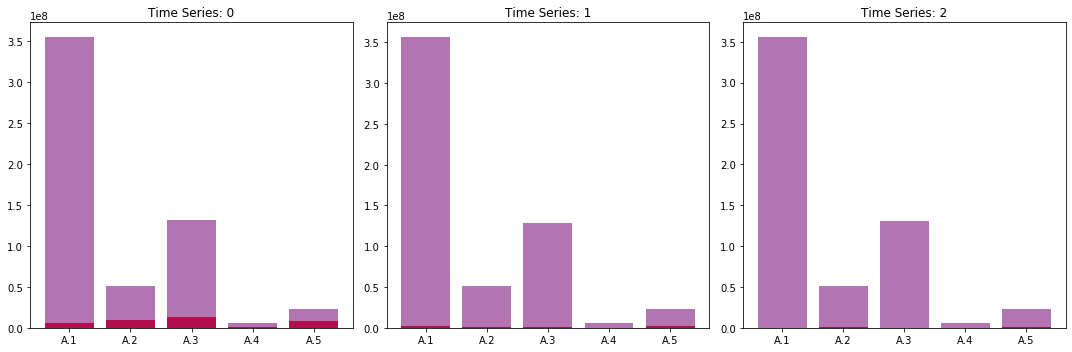

In [159]:
#mean value of expected annual damage of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    damage_list_75 = []
    base_damage_list = []
    base_damage_list_75 = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        damage_list_75.append(results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75))
        
    for i in dike_lists:
        base_damage_list.append(base_results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        base_damage_list_75.append(base_results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75))
        
#    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
#    base_damage = pd.DataFrame([base_damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    
    a.bar(dike_lists, damage_list, color = 'red')
    a.bar(dike_lists, base_damage_list, color = (0.5,0.1,0.5,0.6))
    
    #a.plot(damage_list_75, color = 'blue')
    #a.plot(base_damage_list_75, color = 'blue')
    
    print(damage_list)
    print('damage')
    print(base_damage_list)
    print('base_damage')
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()
#add line

[0.0012750345266271718, 0.0035686669008700195, 0.01042487868457414, 0.0002610925953773126, 0.0019213871799612571]
[0.000250434845880922, 0.0003808572897855057, 0.0012593737580152025, 8.140023669994364e-05, 0.0007311809816013604]
[1.5950474302302093e-05, 0.00012941416301134501, 0.00021771482125795808, 1.626068743359201e-05, 0.00012005089524439694]


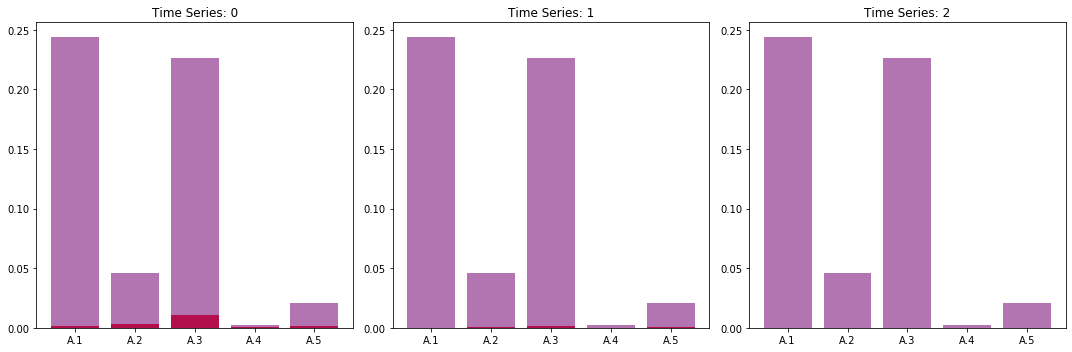

In [9]:
#mean value of Expected Number of Deaths of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    base_damage_list = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    for i in dike_lists:
        base_damage_list.append(base_results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    a.bar(dike_lists, damage_list, color = 'red')
    a.bar(dike_lists, base_damage_list, color = (0.5,0.1,0.5,0.6))
    print(damage_list)
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()


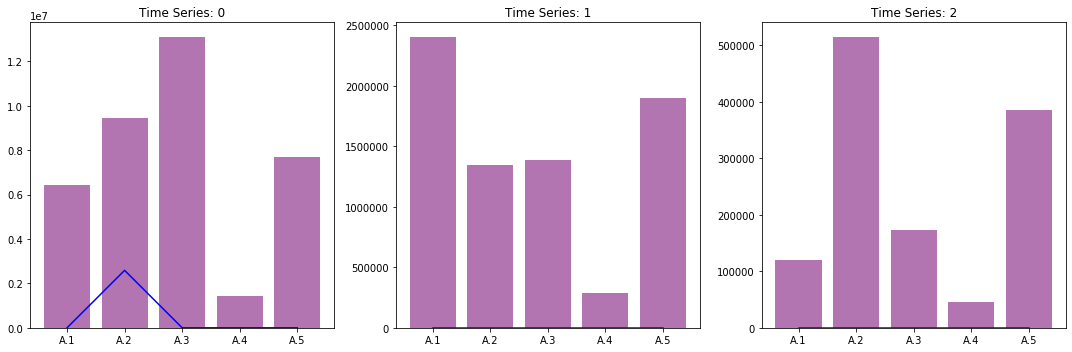

In [152]:
#mean value of expected annual damage of each dike per time serires

#IGNORE THISSS

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    damage_list_75 = []
    base_damage_list = []
    base_damage_list_75 = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        damage_list_75.append(results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75))
        
        worst = results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75)
        
        worst_results = results[results.iloc[:,index]>= worst]
       
        #damage_list.append(worst_results[str(i) + "_Expected Annual Damage "+str(n)].mean())
#        damage_list_75.append(worst_results[str(i) + "_Expected Annual Damage "+str(n)].quantile(1))
#        print(damage_list)
    
    a.bar(dike_lists, damage_list, color = (0.5,0.1,0.5,0.6))
    
    a.plot(damage_list_75, color = 'blue')

    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()

In [39]:
results[results.iloc[:,1]>= 60 ]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total Expected Annual Damage,Total Expected Number of Deaths
0,22.0,316.720229,1.5,0.508918,179.556360,1.0,0.056675,161.786225,1.0,0.411000,...,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000,3.408005e+07,0.004277
2,116.0,342.466577,1.5,0.696968,164.240184,10.0,0.070253,241.641985,10.0,0.701739,...,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000,6.212800e+06,0.000868
3,131.0,317.750054,10.0,0.514734,41.084696,10.0,0.670645,172.060501,1.5,0.002929,...,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,568.536776,1.317818e+09,0.251758
4,69.0,134.031006,1.0,0.056991,141.114722,10.0,0.138095,275.399627,1.0,0.807559,...,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000,3.915193e+07,0.006349
5,12.0,106.976742,1.0,0.252955,160.647954,1.5,0.774425,86.690912,1.0,0.145721,...,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000,4.573816e+07,0.013850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,23.0,151.955766,10.0,0.943525,149.089915,1.5,0.594206,270.182770,1.5,0.089715,...,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000,2.080839e+08,0.039848
74996,39.0,224.496227,1.0,0.390712,243.949795,1.0,0.090980,310.542851,1.5,0.569246,...,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000,1.662128e+08,0.017227
74997,45.0,347.284444,1.0,0.687342,59.820104,1.0,0.659417,229.083131,1.0,0.643934,...,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000,6.387846e+06,0.000916
74998,124.0,106.585076,1.0,0.434781,132.822331,10.0,0.266128,170.757239,10.0,0.151776,...,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000,1.161112e+08,0.014280
